## Erkennung von Kreditkartenbetrug
***
##### von Romeo, Marko, Nikola und Miro

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Kontext 


#### Datenquelle

[kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) - Das genannte Datenset beschäftigt sich mit der Erkennung von Kreditkartenbetrug und enthält verschiedene Informationen zu vergangenen Transaktionen. Es wurde von einer nicht genannten Institution bereitgestellt.

#### Beschaffung der Daten
Die genaue Beschaffungsquelle für das Datenset wurde nicht angegeben. Es wurde jedoch erwähnt, dass das Datenset von einer nicht genannten Institution bezogen wurde. 

#### Problem- und Fragestellung

Problemstellung:
1. Kreditkartenbetrug zu erkennen.

Fragestellung:
1. Wie können wir mithilfe eines Modells Kreditkartenbetrug von legitimen Transaktionen unterscheiden? 
2. Welche Merkmale und Muster in vergangenen Transaktionen können verwendet werden, um betrügerische Aktivitäten zu identifizieren?

#### Zielsetzung
Ziel ist es, ein Klassifizierungsmodell zu entwickeln, das auf Basis historischer Transaktionsdaten eine binäre Einschätzung für jede neue Kreditkartenbuchung gibt

#### Vorgehen & Methoden

##### Importing the data

In [2]:
df = pd.read_csv('card_transdata.csv', sep=',', encoding='utf-8')

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


##### Show data types

In [3]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

##### Show columns

In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


##### correlation matrix

In [5]:
corr = df.corr()
corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


### Explorative Datenanalyse (EDA) (Niki)
Daten beschreiben, Identifizierung und Verstehen von Beziehungen und Gruppen,

### Importing the enriched creditcard fraud data

In [6]:
# Read and select variables
df_orig = pd.read_csv("card_transdata.csv")[[ 'distance_from_home',
                 'distance_from_last_transaction', 
                     'ratio_to_median_purchase_price',
                        'repeat_retailer', 
                        'used_chip', 
                      'used_pin_number', 
                      'online_order', 
                         'fraud']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
# There were no na values
df_orig = df_orig.dropna()
df_orig.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Fraud
print('Fraud:',
      'Count:', round(df.fraud.count(), 1),
      'Min:', round(df.fraud.min(), 1),
      'Max:', round(df.fraud.max(), 1),
      'Mean:', round(df.fraud.mean(), 1),
      'Median:', round(df.fraud.median(), 1),
      'Std:', round(df.fraud.std(), 1))

# distance form home
print('distance from home:',
      'Count:', round(df.distance_from_home.count(), 1),
      'Min:', round(df.distance_from_home.min(), 1),
      'Max:', round(df.distance_from_home.max(), 1),
      'Mean:', round(df.distance_from_home.mean(), 1),
      'Median:', round(df.distance_from_home.median(), 1),
      'Std:', round(df.distance_from_home.std(), 1))

Fraud: Count: 1000000 Min: 0.0 Max: 1.0 Mean: 0.1 Median: 0.0 Std: 0.3
distance from home: Count: 1000000 Min: 0.0 Max: 10632.7 Mean: 26.6 Median: 10.0 Std: 65.4


### Skewness

In [8]:
df.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

### Kurtousis

In [9]:
df.kurtosis()

distance_from_home                 1471.615654
distance_from_last_transaction    46979.271728
ratio_to_median_purchase_price      289.503307
repeat_retailer                       3.575791
used_chip                            -1.606706
used_pin_number                       5.051461
online_order                         -1.601190
fraud                                 6.537067
dtype: float64

### Extreme values

In [10]:
# Long Distance from home
df[df.distance_from_home <= 15].head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0


In [11]:
# Short distance from last transaction
df[df.distance_from_last_transaction < 0.5].head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
11,13.592368,0.240540,1.370330,1.0,1.0,0.0,1.0,0.0


## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [12]:
pd.crosstab(df['distance_from_home'], df['fraud'])

fraud,0.0,1.0
distance_from_home,,
0.004874,1,0
0.021322,1,0
0.022599,1,0
0.024144,1,0
0.024461,1,0
...,...,...
4601.011222,1,0
4823.638452,1,0
5797.972589,1,0


### Pivot tables

In [13]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['fraud', 'distance_from_home', 'ratio_to_median_purchase_price']],
               index=['fraud'],
               values=['distance_from_home', 'ratio_to_median_purchase_price'],
               aggfunc=np.mean)

,distance_from_home,ratio_to_median_purchase_price
fraud,,
0.0,22.832976,1.423642
1.0,66.261876,6.006323


### Correlation matrix

In [14]:
corr = df.corr()
corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


### Covariance matrix

In [15]:
cov = df.cov()
cov

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,4275.954684,0.325861,-0.251567,3.024428,-0.021747,-0.031909,-0.040567,3.464054
distance_from_last_transaction,0.325861,667.865469,0.073256,-0.007752,0.025336,-0.006986,0.001736,0.670877
ratio_to_median_purchase_price,-0.251567,0.073256,7.837698,0.001243,0.000783,0.000793,-0.000440,0.365532
repeat_retailer,3.024428,-0.007752,0.001243,0.104430,-0.000207,-0.000041,-0.000082,-0.000124
used_chip,-0.021747,0.025336,0.000783,-0.000207,0.227620,-0.000200,-0.000050,-0.008216
used_pin_number,-0.031909,-0.006986,0.000793,-0.000041,-0.000200,0.090486,-0.000042,-0.008520
online_order,-0.040567,0.001736,-0.000440,-0.000082,-0.000050,-0.000042,0.227334,0.025851
fraud,3.464054,0.670877,0.365532,-0.000124,-0.008216,-0.008520,0.025851,0.079764


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

<AxesSubplot:xlabel='distance_from_home'>

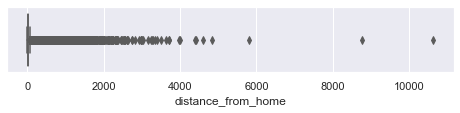

In [16]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['distance_from_home'], color="greenyellow")

### Histogram  (matplotlib)

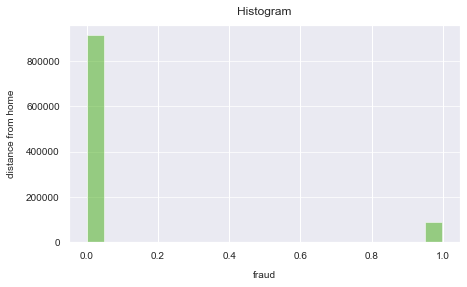

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['fraud'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('fraud', fontsize=10, labelpad=10)
plt.ylabel('distance from home', fontsize=10, labelpad=10)
plt.title('Histogram', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

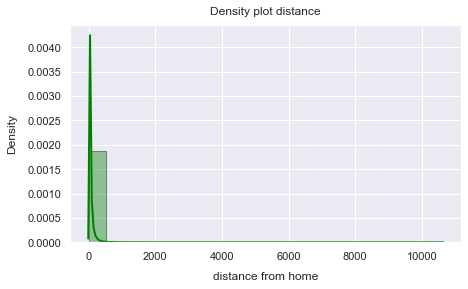

In [18]:
plt.figure(figsize=(7,4))
sns.distplot(df['distance_from_home'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot distance', fontsize=12, pad=10)
plt.xlabel('distance from home', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

        distance_from_home         var
343092            0.004874   -0.407151
37805             0.021322   -0.406899
564282            0.022599   -0.406880
428372            0.024144   -0.406856
239205            0.024461   -0.406851
...                    ...         ...
33705          4601.011222   69.954543
780353         4823.638452   73.359109
266995         5797.972589   88.259284
847723         8777.136420  133.818667
326661        10632.723672  162.195560

[1000000 rows x 2 columns]


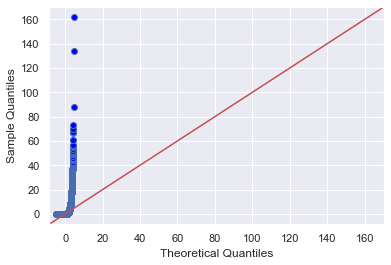

In [19]:
# Variable (standardized)
x = 'distance_from_home'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['distance_from_home', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Piechart (matplotlib)

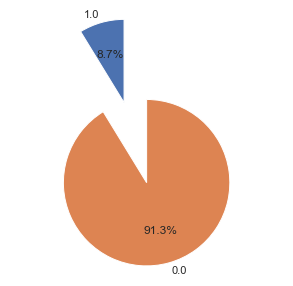

In [20]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.fraud.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0,1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

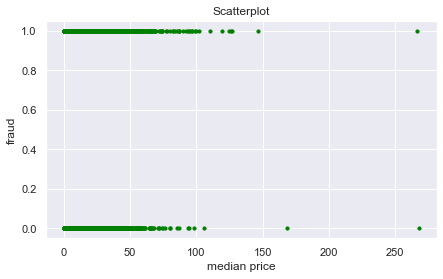

In [21]:
plt.figure(figsize=(7,4))
plt.scatter(df['ratio_to_median_purchase_price'], 
           df['fraud'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('median price')
plt.ylabel('fraud')
plt.show()

### Unifying & Tranformation (Marko)
Datentypen und Formate analysieren und bei Bedarf vereinheitlichen, Daten sinnvoll zusammenführen

In [22]:
# Generelle Informationen zum Dataframe
df.info()

# Nur die Datentypen anzeigen für Analyse
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
 8   var                             1000000 non-null  float64
dtypes: float64(9)
memory usage: 68.7 MB


distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
var                               float64
dtype: object

### Transformation
Alle Daten besitzen den Datentyp float64. Wir haben hier das Glück bei dem Datensatz von Kaggle, dass wir keine Transformation der Datentypen benötigen. Das Format float64 ist bereits für unser Projekt geeignet.

### Unifying
Wir verwenden in unserem Projekt nur einen Datensatz vom Kaggle. Dieser Datensatz hat bereit geeignete Formate und Spalten definiert, die wir später für die Features (erklärenden Variablen) nutzen können. Deshalb benötigen wir keine Vereinheitlichung der Formate. Da wir nicht mehrere Datensätze verwenden, müssen wir die Daten nicht zusammenführen, da alle relevanten Datensätze bereits enthalten sind. Deshalb verwenden wir kein Concatenate, Append, Join, Merge oder Aggregate.

### Scatterplot (matplotlib) with regression line

(289, 9)
-0.9479794049110342
896.4695987402699


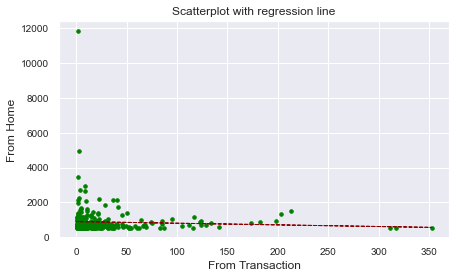

In [23]:
# Subset
df_sub = df.loc[(df.distance_from_last_transaction >= 500)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.distance_from_home, 
         df_sub.distance_from_last_transaction, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.distance_from_home, df_sub.distance_from_last_transaction, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.distance_from_home, 
         b*df_sub.distance_from_home + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('From Home', fontsize=12)
plt.xlabel('From Transaction', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

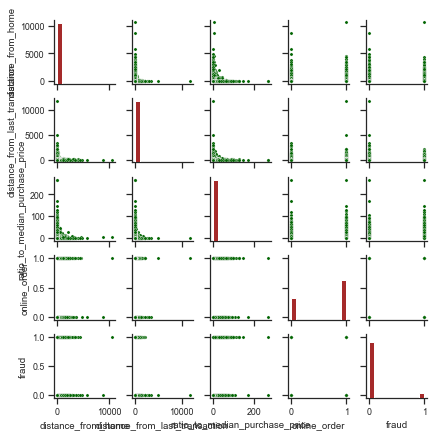

In [24]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['distance_from_home', 
                     'distance_from_last_transaction', 
                     'ratio_to_median_purchase_price', 
                     'online_order',
                     'fraud']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(817657, 9)


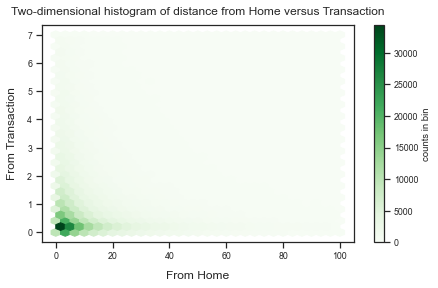

In [25]:
# Subset
df_sub = df.loc[(df.distance_from_home <= 100) & (df.distance_from_last_transaction <= 7)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.distance_from_home, df_sub.distance_from_last_transaction, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('From Home', fontsize=12, labelpad=10)
plt.ylabel('From Transaction', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of distance from Home versus Transaction', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Nicolas EDA

### Correlation heatmap (seaborn)

<AxesSubplot:>

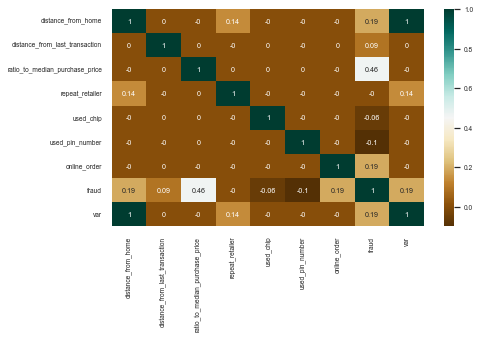

In [26]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Scatterplot

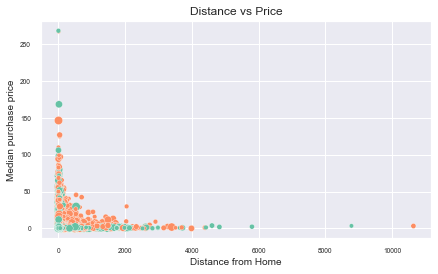

In [27]:
# Subset of df
df_sub = df.loc[(df['distance_from_home'] >= 1) & (df['distance_from_last_transaction'] <= 7)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="distance_from_home", 
                     y="ratio_to_median_purchase_price",
                     size="distance_from_last_transaction", # determines bubble size
                     hue="fraud",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Distance vs Price', fontsize = 12)
ax.set_xlabel('Distance from Home', fontsize = 10)
ax.set_ylabel('Median purchase price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Data Cleansing (Romeo)
Beurteilung der Datenqualität und erforderliche Bereinigung der Daten

Remove outliers from all columns with numerical data

Count of rows:  801087


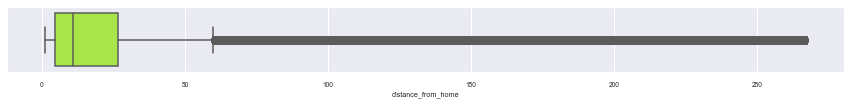

In [28]:
# Remove outliers from distance_from_home
q_low = df_sub["distance_from_home"].quantile(0.01)
q_hi  = df_sub["distance_from_home"].quantile(0.99)

df_filtered = df_sub[(df_sub["distance_from_home"] < q_hi) & (df_sub["distance_from_home"] > q_low)]

plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_filtered['distance_from_home'], color="greenyellow")
print("Count of rows: ", len(df_filtered))



Count of rows:  785065


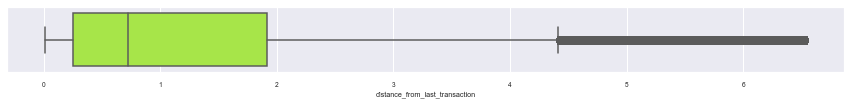

In [29]:
# Remove outliers from distance_from_last_transaction
q_low = df_filtered["distance_from_last_transaction"].quantile(0.01)
q_hi  = df_filtered["distance_from_last_transaction"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["distance_from_last_transaction"] < q_hi) & (df_filtered["distance_from_last_transaction"] > q_low)]

plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_filtered['distance_from_last_transaction'], color="greenyellow")
print("Count of rows: ", len(df_filtered))



Count of rows:  769363


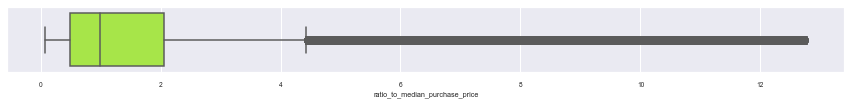

In [30]:
# Remove outliers from distance_from_last_transaction
q_low = df_filtered["ratio_to_median_purchase_price"].quantile(0.01)
q_hi  = df_filtered["ratio_to_median_purchase_price"].quantile(0.99)

df_filtered = df_filtered[(df_filtered["ratio_to_median_purchase_price"] < q_hi) & (df_filtered["ratio_to_median_purchase_price"] > q_low)]

plt.figure(figsize=(15,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_filtered['ratio_to_median_purchase_price'], color="greenyellow")
print("Count of rows: ", len(df_filtered))



In [31]:

df = df_filtered
df


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,var
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.477882
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,-0.241607
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,-0.329369
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,-0.372854
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.268572
...,...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0,-0.373473
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0,-0.103318
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0,-0.362649
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0,-0.342098


### Analysis & Validation (Nikola)
- Analyse der Verteilungen, Abweichungen, Kennzahlen gemäss Unterricht

### Deskriptive Statisik

In [32]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline


### folgendes kann gelöscht werden!!!???

In [33]:
# Read data from your prepared example .csv-file into a dataframe (define seperator)
#data = pd.read_csv("card_transdata.csv", sep=";")
swissgriddata = pd.read_csv("card_transdata.csv", delimiter=',', header=None, skiprows=1, names=['distance_from_home',
                 'distance_from_last_transaction', 
                     'ratio_to_median_purchase_price',
                        'repeat_retailer', 
                        'used_chip', 
                      'used_pin_number', 
                      'online_order', 
                         'fraud'], index_col=False)

# Print the header info of data (first five rows)
swissgriddata.head(5)

pd.read_csv('card_transdata.csv', index_col=False)
df = pd.DataFrame(swissgriddata)
df
#df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [34]:
df.shape

(1000000, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [36]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [37]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [38]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [39]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: np.nan if isinstance(x, type(Ellipsis)) else x)


# Minimale Distanz im Datensatz
min_cons = df['distance_from_home'].min()

# Maximale Distanz im Datensatz
max_cons = df['distance_from_home'].max()

# Durchschnittliche Distanz im Datensatz
mean_cons = (df['distance_from_home'].mean())

# Median-Distanz im Datensatz
median_cons = df['distance_from_home'].median()

# Distanzbezogene Standardabweichung
std_cons = df['distance_from_home'].std()

In [44]:
# Print-Statement der berechneten Variablen
print("Grundlegende Statistiken des Datensatzes:\n")
print("Minimale Distanz:")
print(min_cons)
print(" \n")
print("Maximale Distanz:")
print(max_cons)
print(" \n")
print("Mittelwert Distanz:")
print(mean_cons)
print(" \n")
print("Median Distanz:")
print(median_cons)
print(" \n")
print("Standardabweichung Distanz:")
print(std_cons)
print(" \n")
print("Anzahl Einträge im Datensatzes: {}".format(df.shape[0]))
print("Anzahl Spalten im Datensatzes: {}".format(df.shape[1]))

Grundlegende Statistiken des Datensatzes:

Minimale Distanz:
0.0048743850667442
 

Maximale Distanz:
10632.723672241103
 

Mittelwert Distanz:
26.628792192572483
 

Median Distanz:
9.967760078697681
 

Standardabweichung Distanz:
65.3907843990436
 

Anzahl Einträge im Datensatzes: 1000000
Anzahl Spalten im Datensatzes: 8


In [45]:
df = df.drop('used_chip', axis=1)

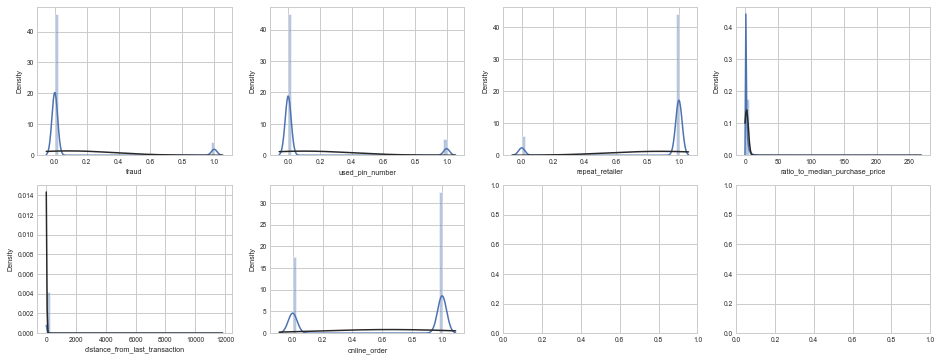

In [46]:
from scipy.stats import norm
features = set(df.columns) - set(['distance_from_home'])
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 6))
for i, f in enumerate(features):
    sns.distplot(df[f], fit=norm, ax=axs[int(i/4), i%4])
    
#(In Anlehnung an Dutli, D., 2020)

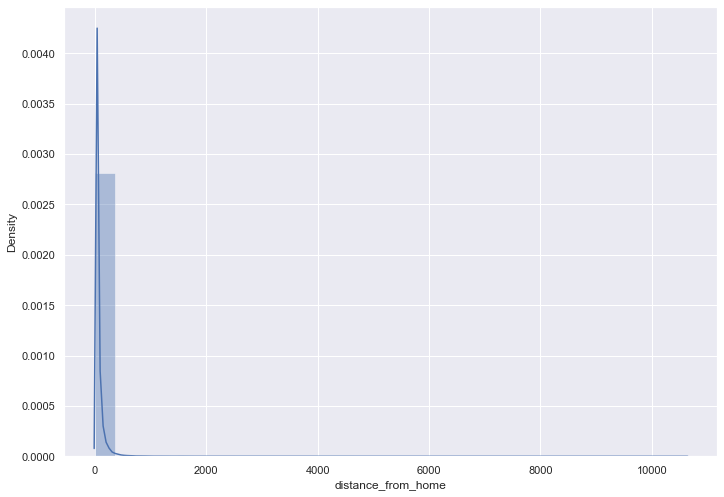

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['distance_from_home'], bins=30, kde=True)
plt.show()

## Standardisierung

In [48]:
corr = df[["distance_from_home",
               "distance_from_last_transaction", 
                     "ratio_to_median_purchase_price",
                        "repeat_retailer", 
                      "used_pin_number", 
                      "online_order", 
                         "fraud"]]

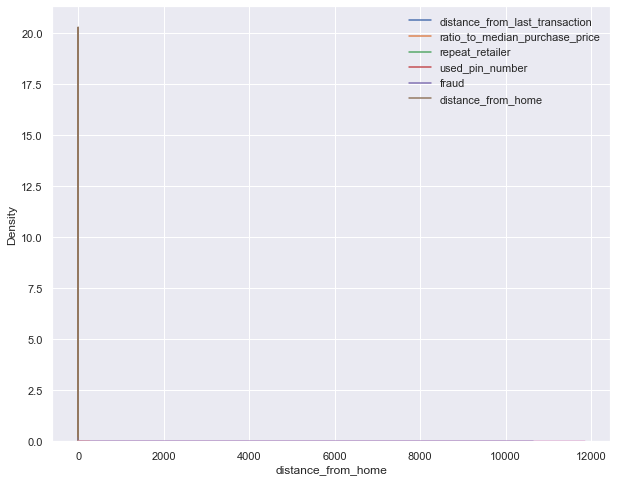

In [49]:
#ax.set_title("distance_from_home")

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sns.kdeplot(corr['distance_from_home'], ax=ax,)
sns.kdeplot(corr['ratio_to_median_purchase_price'], ax=ax)
sns.kdeplot(corr['repeat_retailer'], ax=ax)
sns.kdeplot(corr['used_pin_number'], ax=ax)
sns.kdeplot(corr['online_order'], ax=ax)
sns.kdeplot(corr['fraud'], ax=ax)
sns.kdeplot(corr['distance_from_last_transaction'], ax=ax)
plt.legend(labels=['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_pin_number', 'fraud', 'distance_from_home'])

#(In Anlehnung an Dutli, D., 2020)

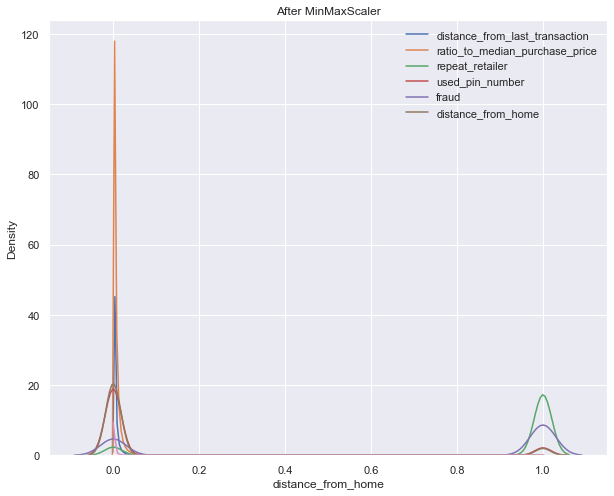

In [50]:
 # Verschiebung der Verteilungen mit dem MinMaxScaler von sklearn
from sklearn import preprocessing

col_names = ["distance_from_home",
               "distance_from_last_transaction", 
                     "ratio_to_median_purchase_price",
                        "repeat_retailer", 
                      "used_pin_number", 
                      "online_order", 
                         "fraud"]

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(corr)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['distance_from_home'], ax=ax1,)
sns.kdeplot(df_mm['ratio_to_median_purchase_price'], ax=ax1)
sns.kdeplot(df_mm['repeat_retailer'], ax=ax1)
sns.kdeplot(df_mm['used_pin_number'], ax=ax1)
sns.kdeplot(df_mm['online_order'], ax=ax1)
sns.kdeplot(df_mm['fraud'], ax=ax1)
sns.kdeplot(df_mm['distance_from_last_transaction'], ax=ax1)
plt.legend(labels=['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_pin_number', 'fraud', 'distance_from_home'])

#(In Anlehnung an Dutli, D., 2020)

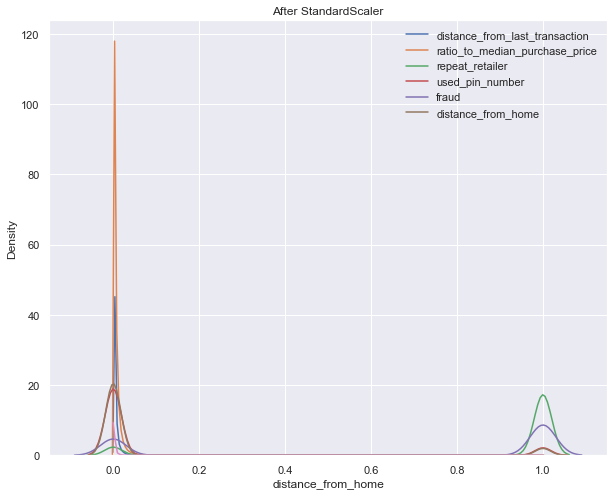

In [51]:
# Verschiebung der Verteilungen mit dem StandardScaler von sklearn
from sklearn import preprocessing

col_names = ["distance_from_home",
               "distance_from_last_transaction", 
                     "ratio_to_median_purchase_price",
                        "repeat_retailer", 
                      "used_pin_number", 
                      "online_order", 
                         "fraud"]

st_scaler = preprocessing.StandardScaler()
df_st = st_scaler.fit_transform(corr)

df_st = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')
          
sns.kdeplot(df_mm['distance_from_home'], ax=ax1,)
sns.kdeplot(df_mm['ratio_to_median_purchase_price'], ax=ax1)
sns.kdeplot(df_mm['repeat_retailer'], ax=ax1)
sns.kdeplot(df_mm['used_pin_number'], ax=ax1)
sns.kdeplot(df_mm['online_order'], ax=ax1)
sns.kdeplot(df_mm['fraud'], ax=ax1)
sns.kdeplot(df_mm['distance_from_last_transaction'], ax=ax1)

plt.legend(labels=['distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_pin_number', 'fraud', 'distance_from_home'])

#(In Anlehnung an Dutli, D., 2020)

### Ausreisser

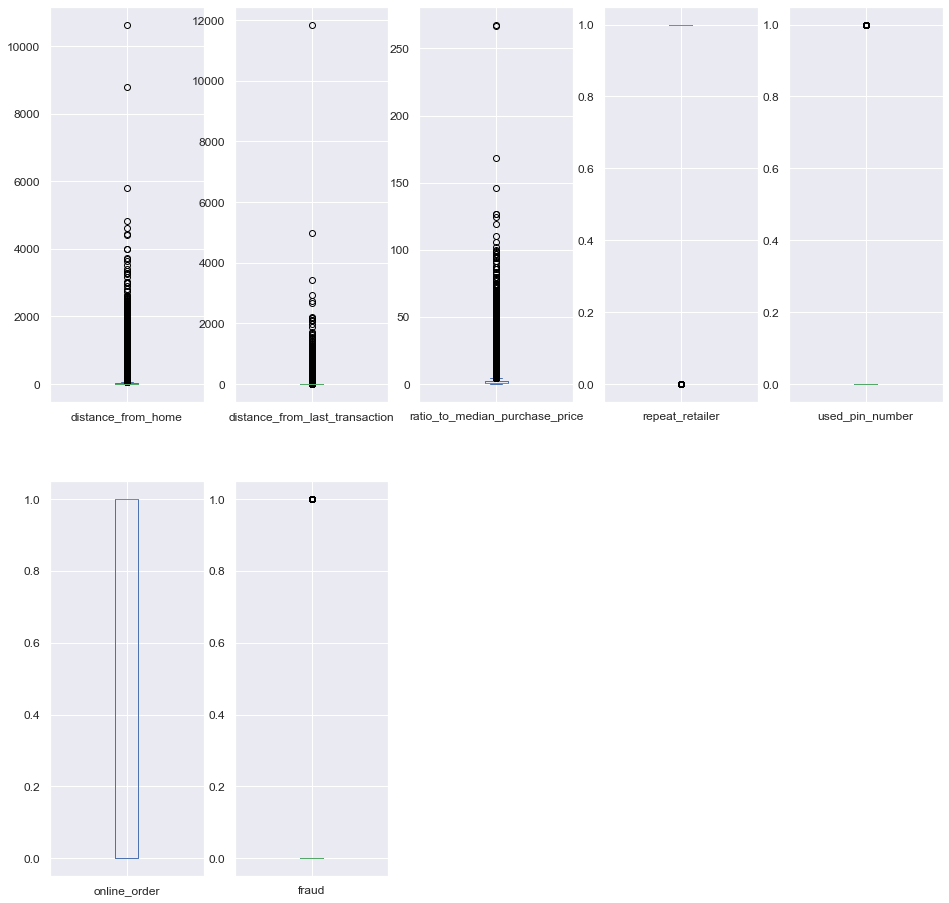

In [52]:
df.plot(kind="box", subplots=True, layout= (2,5), fontsize=12, figsize=(16,16));

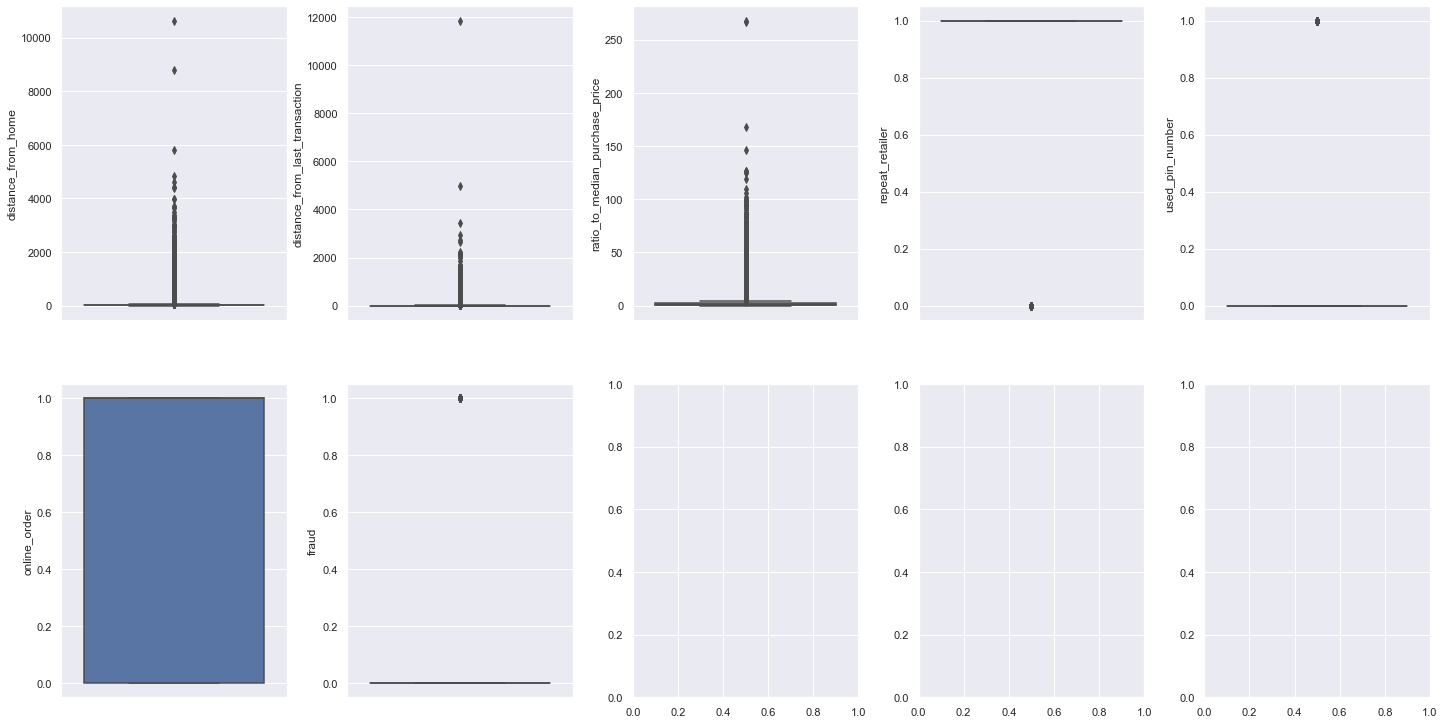

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for label,content in df.items():
    sns.boxplot(y=label, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#(In Anlehnung an Dutli, D., 2020)

In [54]:
# Funktion zur Berechnung der Whiskers:
def iqr_fences(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lowerFence = Q1 - (1.5 * IQR)
    upperFence = Q3 + (1.5 * IQR)
    return lowerFence, upperFence

#(In Anlehnung an Dutli, D., 2020)

In [55]:
for label, content in df.items():
        Q1 = content.quantile(0.25)
        Q3 = content.quantile(0.75)
        IQR = Q3 - Q1
        v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))
        
#(In Anlehnung an Dutli, D., 2020)

Spalte distance_from_home Anteil an Outliers = 10.36%
Spalte distance_from_last_transaction Anteil an Outliers = 12.44%
Spalte ratio_to_median_purchase_price Anteil an Outliers = 8.44%
Spalte repeat_retailer Anteil an Outliers = 100.0%
Spalte used_pin_number Anteil an Outliers = 100.0%
Spalte online_order Anteil an Outliers = 0.0%
Spalte fraud Anteil an Outliers = 100.0%


In [56]:
for i in df.columns:
    result = iqr_fences(df[i])
    lowerFence = result[0]
    upperFence = result[1]
    print("Lower Fence of {}: {}".format(i,lowerFence))
    print("Upper Fence of {}: {}".format(i, upperFence))
    
#(In Anlehnung an Dutli, D., 2020)

Lower Fence of distance_from_home: -28.920957602736546
Upper Fence of distance_from_home: 58.54295065212743
Lower Fence of distance_from_last_transaction: -4.291944930383116
Upper Fence of distance_from_last_transaction: 7.944363262531519
Lower Fence of ratio_to_median_purchase_price: -1.9553720889586974
Upper Fence of ratio_to_median_purchase_price: 4.527415677411437
Lower Fence of repeat_retailer: 1.0
Upper Fence of repeat_retailer: 1.0
Lower Fence of used_pin_number: 0.0
Upper Fence of used_pin_number: 0.0
Lower Fence of online_order: -1.5
Upper Fence of online_order: 2.5
Lower Fence of fraud: 0.0
Upper Fence of fraud: 0.0


In [57]:
##Achtung: dauert sehr lange (> 30 Min.)
#plt.figure(figsize=(10, 8))
#ax = sns.boxplot(y="total_cons", data=df)
#ax = sns.swarmplot(y="total_cons", data=df, color=".25")

lowerFence, upperFence = iqr_fences(df['distance_from_home'])

#Print-Statement für Whiskers
print("Min-Whisker: {}".format((lowerFence*1000).round(2)))
print("Max-Whisker: {}".format((upperFence*1000).round(2)))

#(In Anlehnung an Dutli, D., 2020)

Min-Whisker: -28920.96
Max-Whisker: 58542.95


In [58]:
# Print Anzahl der Datensätze, welche überhalb dem Max-Whisker liegen:
print(len(df[df['distance_from_home'] > 58542.95]))
print(len(df[df['distance_from_home'] < -28920.96]))

#(In Anlehnung an Dutli, D., 2020)

0
0


In [59]:
Q1 = df['distance_from_home'].quantile(0.25)
Q3 = df['distance_from_home'].quantile(0.75)
IQR = Q3 - Q1
MaxW = Q3 + 1.5*IQR
MinW = Q1 - 1.5*IQR

Max_Cons = df[df['distance_from_home']>MaxW]
Max_Cons

#(In Anlehnung an Dutli, D., 2020)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,0.0,0.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,0.0
16,114.519789,0.707003,0.516990,1.0,0.0,0.0,0.0
20,78.623242,1.409245,1.838016,1.0,0.0,0.0,0.0
30,85.837253,1.035118,0.868296,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
999916,167.139756,0.282253,0.308468,1.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,1.0,1.0
999924,108.428315,0.050380,0.595808,1.0,0.0,0.0,0.0
999941,142.526517,0.224511,0.368224,1.0,0.0,1.0,0.0


## Korrelation

In [60]:
corr = df[["distance_from_home",
               "distance_from_last_transaction", 
                     "ratio_to_median_purchase_price",
                        "repeat_retailer", 
                      "used_pin_number", 
                      "online_order", 
                         "fraud"]]
corr[corr.columns[:]].corr()['distance_from_home'][:]

distance_from_home                1.000000
distance_from_last_transaction    0.000193
ratio_to_median_purchase_price   -0.001374
repeat_retailer                   0.143124
used_pin_number                  -0.001622
online_order                     -0.001301
fraud                             0.187571
Name: distance_from_home, dtype: float64

<AxesSubplot:>

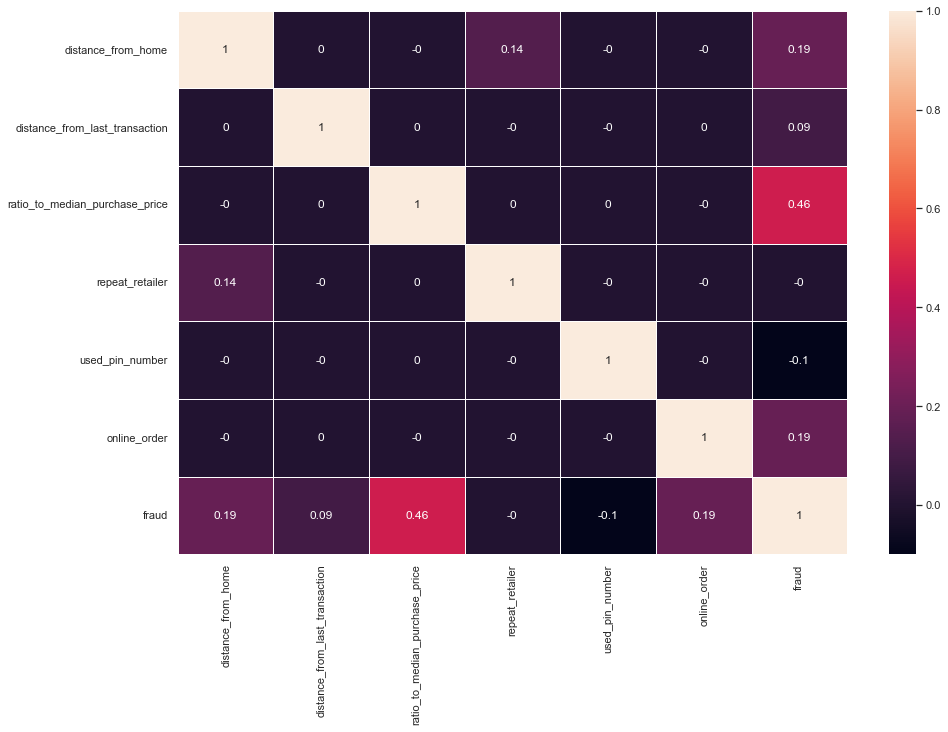

In [61]:
import seaborn as sns
df_heatmap = df.corr().round(2)
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_heatmap, annot=True, annot_kws={'size': 12}, linewidths=.5)

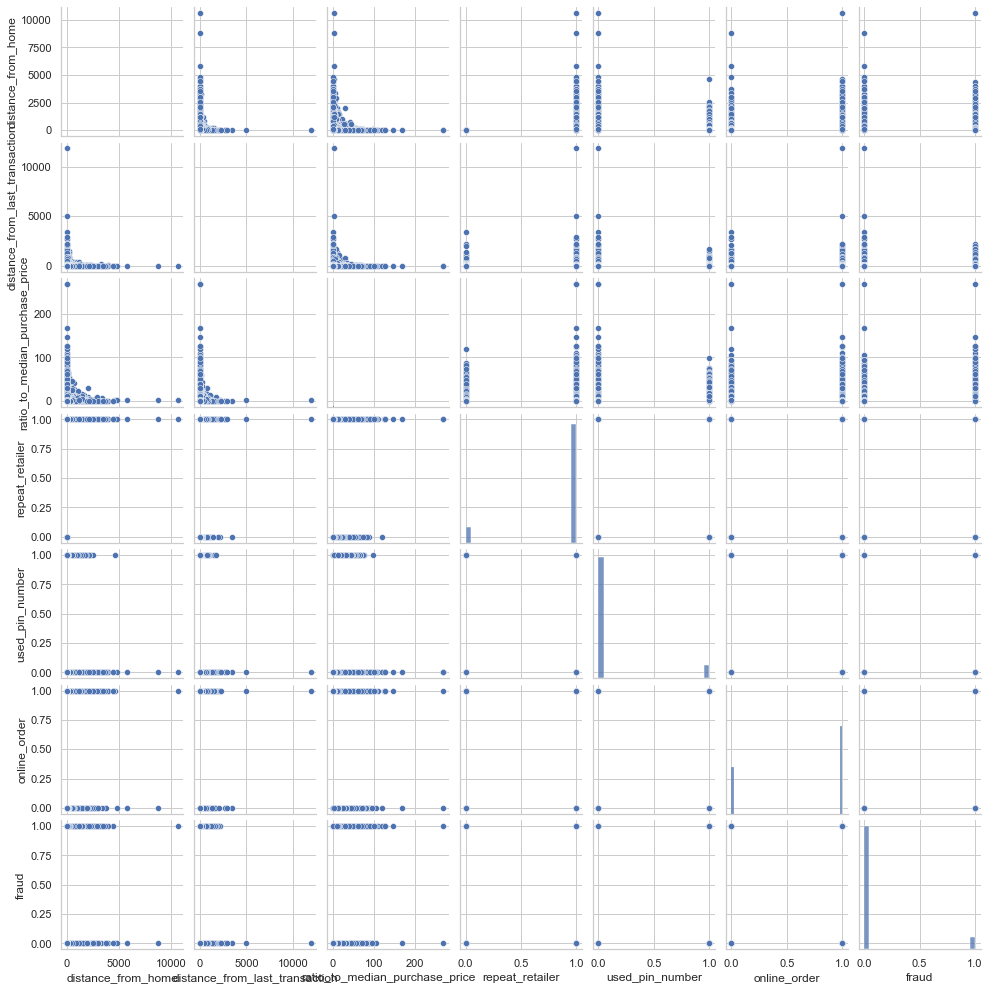

In [62]:
feature_names = ['distance_from_home',
                 'distance_from_last_transaction', 
                     'ratio_to_median_purchase_price',
                        'repeat_retailer', 
                      'used_pin_number', 
                      'online_order', 
                         'fraud']

sns.set(style='whitegrid',context='notebook')
cols=df[feature_names]
sns.pairplot(cols,height=2)
plt.show()


In [63]:
import numpy as np
from scipy.stats.stats import pearsonr
np.random.seed(101)
normal = np.random.normal(loc=0.0, scale= 1.0, size=1000)
print('Mean: %0.3f Median: %0.3f Variance: %0.3f' %
     (np.mean(normal), np.median(normal), np.var(normal)))

Mean: 0.026 Median: 0.032 Variance: 1.109


##### __Univariate Method with Tukey Boxplot__

### Feature Selection & Engineering 
- Analyse der Korrelationen und Kausalitäten, Identifikation der Features (erklärende Variablen),
ggf. Optimierung der Datengrundlage 

### Korrelation der Daten analysieren

<AxesSubplot:>

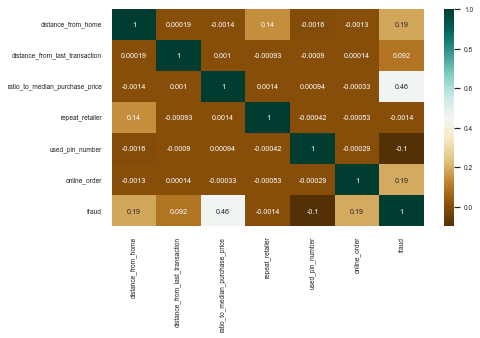

In [64]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df.corr()

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Korrelationen mit Fraud
Interressant für uns sind die Korrelationskoeffizienten bei der Spalte fraud. Die Distance_from_home hat eine Korrelationskoeffizient von 0.19. Hier kann man also von einer leicht positiven Korrelation sprechen. Auch online_order hat ein Korrelationskoeffizient von 0.19. Hier wiederum besteht auch eine leicht positive Korrelation zu Fraud.

Distance_from_last_transaction und used_pin_number haben beide etwa einen Koeffizienten von 0.1, nur dass bei used_pin_number eine sehr leicht negative Korrelation besteht zu Fraud, hingegen bei Distance_from_last_transaction ist sie sehr leicht positiv.

ratio_to_median_purchase_price hat in dem Datensatz die stärkste positive Korrelation zu Fraud. Mit einem Koeffizient von 0.46 besteht eine mittelstarke Korrelation zu Fraud.

repeat_retailer und used_chip haben beide beinahe einen Koeffizienten von 0. Hier besteht also keine Korrelation mit Fraud-Fällen.

# Kausalität analsieren

### fraud und ratio_to_median_purchase_price

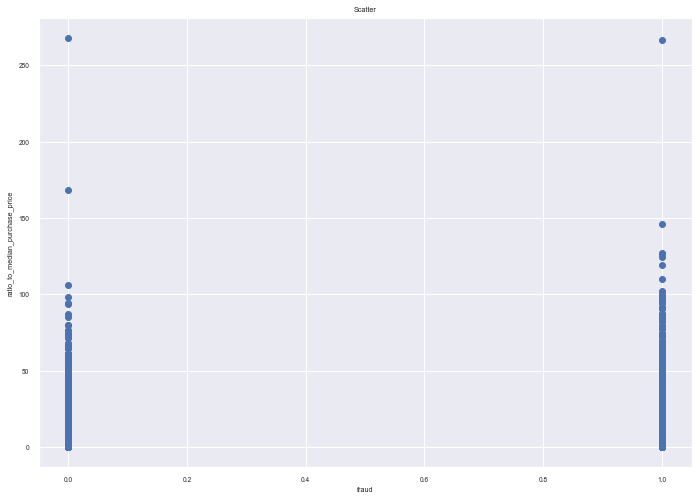

0.0

In [65]:
from scipy.stats import ttest_ind

# Datensätze nach fraud spalten 0 oder 1
fraud0 = df[df['fraud'] == 0]['ratio_to_median_purchase_price']
fraud1 = df[df['fraud'] == 1]['ratio_to_median_purchase_price']

# Streudiagramm erstellen
plt.scatter(df['fraud'], df['ratio_to_median_purchase_price'])
plt.xlabel('fraud')
plt.ylabel('ratio_to_median_purchase_price')
plt.title('Scatter')
plt.show()

# T-test um Kausalität zu beurteilen, p-wert berücksichtigen
t_statistic, p_value = ttest_ind(fraud0, fraud1, alternative='two-sided')
p_value

Der P-Wert liegt unter 0.05, darum können wir behaupten, dass zwischen Fraud und ratio_to_median_purchase_price eine Kausalität besteht und sie sich beeinfliessen.

### fraud und distance_from_home

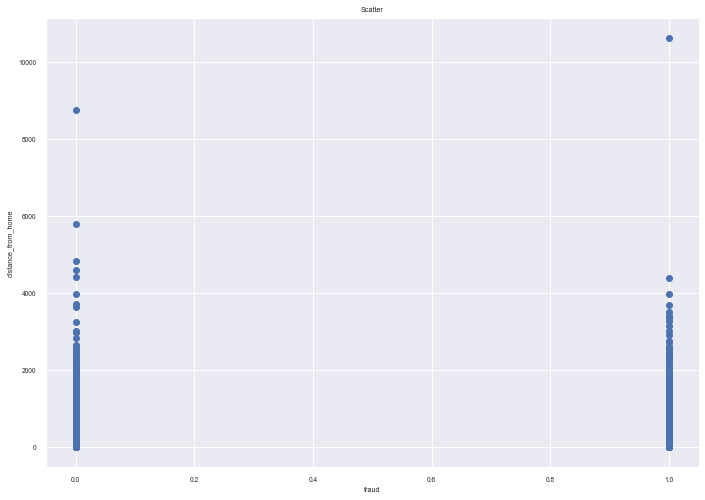

0.0

In [66]:
# Datensätze nach fraud spalten 0 oder 1
fraud0 = df[df['fraud'] == 0]['distance_from_home']
fraud1 = df[df['fraud'] == 1]['distance_from_home']

# Streudiagramm erstellen
plt.scatter(df['fraud'], df['distance_from_home'])
plt.xlabel('fraud')
plt.ylabel('distance_from_home')
plt.title('Scatter')
plt.show()

# T-test um Kausalität zu beurteilen, p-wert berücksichtigen
t_statistic, p_value = ttest_ind(fraud0, fraud1, alternative='two-sided')
p_value

Der P-Wert liegt unter 0.05, darum können wir behaupten, dass zwischen Fraud und distance_from_home eine Kausalität bestehet.

### fraud und distance_from_last_transaction

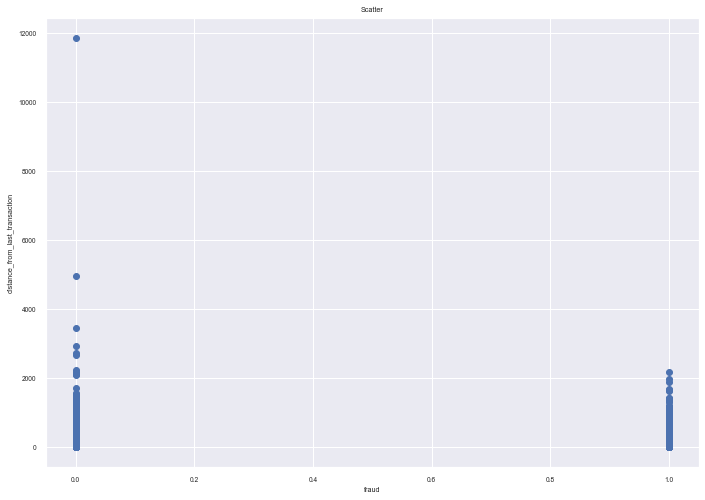

0.0

In [67]:
# Datensätze nach fraud spalten 0 oder 1
fraud0 = df[df['fraud'] == 0]['distance_from_last_transaction']
fraud1 = df[df['fraud'] == 1]['distance_from_last_transaction']

# Streudiagramm erstellen
plt.scatter(df['fraud'], df['distance_from_last_transaction'])
plt.xlabel('fraud')
plt.ylabel('distance_from_last_transaction')
plt.title('Scatter')
plt.show()

# T-test um Kausalität zu beurteilen, p-wert berücksichtigen
t_statistic, p_value = ttest_ind(fraud0, fraud1, alternative='two-sided')
p_value

Der P-Wert liegt unter 0.05, darum können wir behaupten, dass zwischen Fraud und distance_from_last_transaction eine Kausalität bestehen kann.

### fraud und repeat_retailer

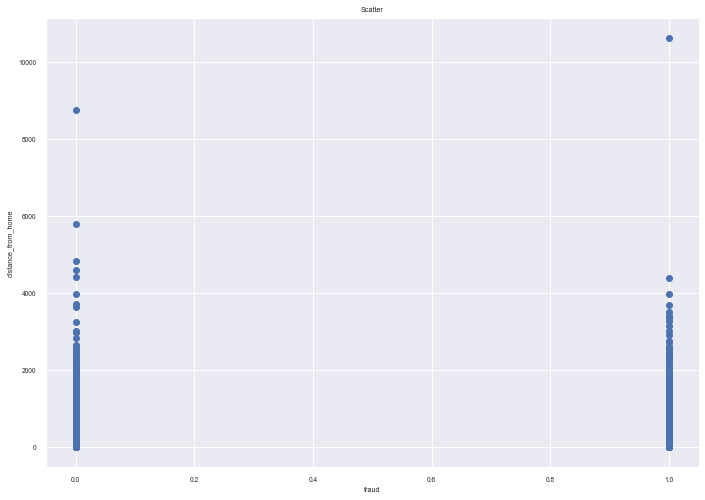

0.1746385770318413

In [68]:
# Datensätze nach fraud spalten 0 oder 1
fraud0 = df[df['fraud'] == 0]['repeat_retailer']
fraud1 = df[df['fraud'] == 1]['repeat_retailer']

# Streudiagramm erstellen
plt.scatter(df['fraud'], df['distance_from_home'])
plt.xlabel('fraud')
plt.ylabel('distance_from_home')
plt.title('Scatter')
plt.show()

# T-test um Kausalität zu beurteilen, p-wert berücksichtigen
t_statistic, p_value = ttest_ind(fraud0, fraud1)
p_value

Der P-Wert liegt über 0.05, darum können wir behaupten, dass zwischen Fraud und repeat_retailer keine Kausalität besteht.

# Feature Selection

In [69]:
# Alle Spalten anzeigen
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_pin_number',
       'online_order', 'fraud'],
      dtype='object')

### Target Variable
In unserem Projekt geht es darum, Transaktionsfälle zu klassifizieren, ob es sich dabei um Fraud handeln kann. In diesem Datensatz ist also die Fraud-Spalte die Target Variable. Es gibt insgesamt 7 weitere Spalten, die mögliche Features für unseren Klassifikationsfall darstellen können. 

Wenn wir die Features ahnand ihrer Korrelation bewerten, sehen wir, dass repeat_retailer und used_chip irrelevante Features sind, die Fraud nicht erklären können, da beide beinahe keine Korrelation aufzeigen und keine Kausalität besteht. 

Hingegen können die anderen Features durchaus berücksichtigt werden. Distance_from_last_transaction, used_pin_number, Discante_from_home und online_order haben alle eine sehr leichte bis leichte Korrelation mit Fraud. Auch ratio_to_median_purchase_price hat eine mittelstarke Korrelation, darum ist sie am ehesten geeignet, um Fraud erklären zu können. Alle besitzten auch eine gewisse Kausalität zu Fraud.

Die Features mit einer gewissen Korrelation und Kausalität beinhalten keine Informationen, die zu Fraud direkt gehören und haben keinen direkten Zusammenhang zu Fraud. Diese Features werden wir in unseren Modellen verwenden, da sie relevant für Fraud, unabhänig von Fraud und nicht reduntante Daten sind.

### Anwendung in Machine Learning
- Entwicklung von Regressions- oder Klassifikationsmodellen (mind. 2 Modelle),
Performance-Vergleich und –Interpretation

Von uns wurden die Modelle Random Forest und Logistic Regression gewählt.
Das Random Forest Modell wurde gewählt da es aussagekräftige Predictions bestimmen kann und das Potenzial für eine hohe Accuracy hat.
Die Logisitc Regression wurde gewählt da es gut interpretierbar ist und für binäre Klassifikationen geeignet ist.

#### Random Forest

In [70]:

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,1.0,0.0


####  Train model

In [71]:
## train model
## df_model
## df_filtered
X_train, X_test, y_train, y_test = train_test_split(df_filtered[[ 'distance_from_home',
                                                                'distance_from_last_transaction',
                                                                'ratio_to_median_purchase_price',
                                                                'repeat_retailer',
                                                                'used_chip',
                                                                'used_pin_number',
                                                                'online_order']], 
                                                                df_filtered['fraud'], 
                                                                test_size=0.20, 
                                                                random_state=42)
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
        distance_from_home  distance_from_last_transaction  \
993154            2.972785                        0.941984   
262791           29.309130                        0.113953   
302767           17.299307                        1.445934   
949421            4.639090                        0.342118   
964112            5.384095                        2.742395   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
993154                        0.521816              1.0        0.0   
262791                        1.121026              1.0        1.0   
302767                        0.641677              1.0        0.0   
949421                        0.352424              1.0        1.0   
964112                        1.091895              1.0        0.0   

        used_pin_number  online_order  
993154              0.0           1.0  
262791              0.0           0.0  
302767              0.0           0.0  
949421              0.0           1.0

#### Initialize Classification Tree model and train model

In [72]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

#### Plot Classification Tree

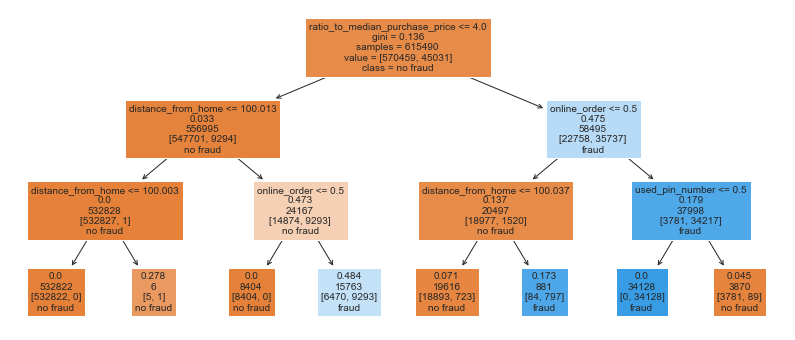

In [73]:
fig = plt.figure(figsize=(14,6))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['no fraud', 'fraud'],
                   filled=True,
                   fontsize=10,
                   label='root')

## Calculate random forrest classifier

In [74]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_filtered[[ 'distance_from_home',
                                                                'distance_from_last_transaction',
                                                                'ratio_to_median_purchase_price',
                                                                'repeat_retailer',
                                                                'used_chip',
                                                                'used_pin_number',
                                                                'online_order']], 
                                                                df_filtered['fraud'], 
                                                        test_size=0.20, 
                                                        random_state=42)
# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived) -------------------------------------------------!!!!!!!!!
y_pred_rf = rfc.predict(X2_test)
y_pred_rf

X2_train:
        distance_from_home  distance_from_last_transaction  \
993154            2.972785                        0.941984   
262791           29.309130                        0.113953   
302767           17.299307                        1.445934   
949421            4.639090                        0.342118   
964112            5.384095                        2.742395   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
993154                        0.521816              1.0        0.0   
262791                        1.121026              1.0        1.0   
302767                        0.641677              1.0        0.0   
949421                        0.352424              1.0        1.0   
964112                        1.091895              1.0        0.0   

        used_pin_number  online_order  
993154              0.0           1.0  
262791              0.0           0.0  
302767              0.0           0.0  
949421              0.0           1.

array([0., 0., 0., ..., 0., 0., 0.])

### Evaluation of the Random Forest Classiffier model.

In [75]:
# The following function was provided by Maria Pelli

def make_confusion_matrix(cf_matrix, group_names=None, categories='auto', count=True,
                          percent=True, cbar=True, xyticks=True, xyplotlabels=True,
                          figsize=None, cmap='Blues'):
    """
    This function prints and plots a confusion matrix.
    """
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories,
                yticklabels=categories)

    if xyticks:
        plt.xticks(ticks=np.arange(cf_matrix.shape[1]) + 0.5, labels=categories)
        plt.yticks(ticks=np.arange(cf_matrix.shape[0]) + 0.5, labels=categories)

    if xyplotlabels:
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    plt.title('Confusion Matrix')
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.show()

In [76]:
print(y_test)
X_test

451302    0.0
368529    0.0
858197    0.0
960511    0.0
373935    0.0
         ... 
121818    0.0
629719    1.0
308867    0.0
520569    0.0
558593    0.0
Name: fraud, Length: 153873, dtype: float64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
451302,29.735993,0.401108,0.495565,1.0,1.0,0.0,0.0
368529,3.643567,2.006983,3.511672,1.0,0.0,0.0,1.0
858197,2.468971,0.564936,0.558722,1.0,0.0,0.0,1.0
960511,8.842028,2.509793,0.083714,1.0,1.0,0.0,1.0
373935,4.811374,0.439330,0.640785,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
121818,3.639922,5.291399,0.683458,1.0,1.0,0.0,1.0
629719,56.227680,4.500274,4.284270,1.0,0.0,0.0,1.0
308867,3.073866,0.100259,0.256488,1.0,0.0,0.0,0.0
520569,7.453857,0.742204,0.114771,1.0,0.0,0.0,1.0


#### Classification report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    142582
         1.0       0.87      0.98      0.92     11291

    accuracy                           0.99    153873
   macro avg       0.93      0.99      0.96    153873
weighted avg       0.99      0.99      0.99    153873



#### Confusion matrix

In [78]:
print(confusion_matrix(y_test, y_pred), '\n')

[[140877   1705]
 [   201  11090]] 



[[140877   1705]
 [   201  11090]]


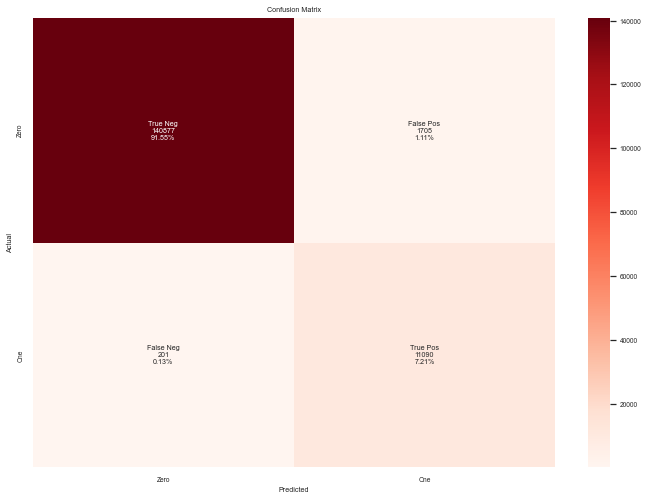

<Figure size 216x144 with 0 Axes>

In [79]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, figsize=(3,2), cmap='Reds')

#### Plot feature importance

Index(['ratio_to_median_purchase_price', 'online_order', 'distance_from_home',
       'used_pin_number', 'used_chip', 'repeat_retailer',
       'distance_from_last_transaction'],
      dtype='object')
[5.71475589e-01 1.85910183e-01 1.30022707e-01 6.21341861e-02
 4.61700040e-02 3.75973340e-03 5.27598227e-04]


<AxesSubplot:ylabel='features'>

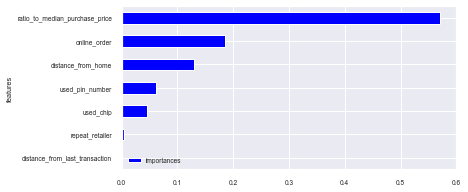

In [80]:
cols = X2_train.columns
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print( cols[indices] )
print( importances[indices] )
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='blue', 
           figsize=(6,3))

#### Plot ROC curve and calculate AUC

In [81]:
plt.figure(figsize=(6,4))
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X_test, 
                                          y_test, 
                                          alpha=0.8,
                                          c="darkblue")
plt.show()

AttributeError: type object 'RocCurveDisplay' has no attribute 'from_estimator'

<Figure size 432x288 with 0 Axes>

## Logistic Regression
Der folgende code basiert auf dem, im Modul "Python Grundlagen und Anwendung in DataScience" von Frau Maria Pelli zur Verfügung gestellten, Code. 

In [ ]:
import sklearn
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, log_loss, f1_score
import shap

In [ ]:
# Split the dataframe into features (X) and target variable (y)
X = df_filtered[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
        'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']]
y = df_filtered['fraud']

In [ ]:
# Create the logistic regression model
lr_a = LogisticRegression(max_iter=1000, solver='liblinear')


In [ ]:
# Perform train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation
scores = cross_val_score(lr_a, X2_train, y2_train, cv=5)  # Specify the number of folds for cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

In [ ]:
# Fit the logistic regression model on the training data
lr_a.fit(X2_train, y2_train)

# Predict on the test data
y2_pred = lr_a.predict(X2_test)

# Print evaluation metric "Classification Report" on the test data
print("Classification Report:")
print(classification_report(y2_test, y2_pred))

In [ ]:
# Calculate accuracy score on train and test data
train_score = lr_a.score(X2_train, y2_train)
test_score = lr_a.score(X_test, y_test)
print("Accuracy score on train data: ", train_score)
print("Accuracy score on test data: ", test_score)

# Calculate log loss on train and test data
train_log_loss = log_loss(y2_train, lr_a.predict_proba(X2_train))
test_log_loss = log_loss(y_test, lr_a.predict_proba(X_test))
print("Log Loss on train data: ", train_log_loss)
print("Log Loss on test data: ", test_log_loss)

# Calculate F1 score on train and test data
train_f1_score = f1_score(y2_train, lr_a.predict(X2_train))
test_f1_score = f1_score(y_test, lr_a.predict(X_test))
print("F1 score on train data: ", train_f1_score)
print("F1 score on test data: ", test_f1_score)

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y2_test, y2_pred)
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, figsize=(7,4), cmap='Reds')

In [ ]:
# The following function was provided by Maria Pelli
def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == y2_test)/len(y2_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

## Downsampling rows of fraud=negative to 60% (-> and fraud=positive: 40%) and train new model to reevaluate model

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_filtered[df_filtered['fraud'] == 0.0]
df_minority = df_filtered[df_filtered['fraud'] == 1.0]

# Determine the desired number of rows for the minority class
desired_rows_minority = int(0.4 * len(df_majority) / 0.6)

# Undersample the majority class to match the desired class balance
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Set to False for undersampling
                                   n_samples=desired_rows_minority,
                                   random_state=42)

# Concatenate the downsampled majority class and the original minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame to randomize the order of rows
df_downsampled = df_downsampled.sample(frac=1, random_state=42)

# Verify the class balance in the downsampled DataFrame
print(df_downsampled['fraud'].value_counts())

# Use the downsampled DataFrame for further analysis or modeling
X3 = df_downsampled.drop('fraud', axis=1)
y3 = df_downsampled['fraud']

In [ ]:
# Create the logistic regression model
lr_a = LogisticRegression(max_iter=1000, solver='liblinear')

# Perform train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Perform cross-validation
scores = cross_val_score(lr_a, X3_train, y3_train, cv=5)  # Specify the number of folds for cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Fit the logistic regression model on the training data
lr_a.fit(X3_train, y3_train)

# Predict on the test data
y3_pred = lr_a.predict(X3_test)

# Print evaluation metrics on the test data
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

# Calculate accuracy score on train and test data
train_score = lr_a.score(X3_train, y3_train)
test_score = lr_a.score(X3_test, y3_test)
print("Accuracy score on train data: ", train_score)
print("Accuracy score on test data: ", test_score)

# Calculate log loss on train and test data
train_log_loss = log_loss(y3_train, lr_a.predict_proba(X3_train))
test_log_loss = log_loss(y3_test, lr_a.predict_proba(X3_test))
print("Log Loss on train data: ", train_log_loss)
print("Log Loss on test data: ", test_log_loss)

# Calculate F1 score on train and test data
train_f1_score = f1_score(y3_train, lr_a.predict(X3_train))
test_f1_score = f1_score(y3_test, lr_a.predict(X3_test))
print("F1 score on train data: ", train_f1_score)
print("F1 score on test data: ", test_f1_score)


In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y3_test, y3_pred)
print(cf_matrix)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, figsize=(7,4), cmap='Reds')

### Anwendung von XAI – Techniken
- Anwendung von XAI – Techniken, um die entwickelten Modelle
in Bezug auf die Fallstudie zu erklären

In [ ]:
import shap

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.dependence_plot("online_order", shap_values[0], X_test)

In [ ]:
shap.dependence_plot("distance_from_home", shap_values[0], X_test)

In [ ]:
shap.dependence_plot("ratio_to_median_purchase_price", shap_values[0], X_test)

##### Jupyter notebook --footer info--

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')